In [ ]:
import tensorflow as tf


In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# !cp -r /content/drive/MyDrive/ML/Food-Not-Food/images/imagenet_images/imagenet_images/atom_bomb  /content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images

In [ ]:
import os
for dirs,sub_dirs, files in os.walk("/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images"):
  print(dirs)
  print(sub_dirs)
  print(files)

/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images
['bird', 'atom_bomb']
[]
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/bird
[]
['2629966818_cff116c8e0.jpg', '172543629_1348b94a60.jpg', '2316755112_aaf81f1bec_o.jpg', '2665244628_1b96f661fb.jpg', '387329324_16c805ed30.jpg', '424963920_20beb6b91a.jpg', '2425290519_2a508fb03a.jpg', '1535999699_5aa329ae62.jpg', '2743499893_bda09587fd_o.jpg', '2595805254_df10dc7c8a.jpg', '2425909833_e251a97836.jpg', '94863900_a07816cab1.jpg', '1440471419_a188c2276c.jpg', '443738091_113fa2dd3a.jpg', '2308831578_1e99fe0272.jpg', '373783045_47ea5d9e5c.jpg', '2393254614_3b3594f4c4.jpg', '246106087_63f1a3ee04.jpg', '1552527337_6f819e3a3e.jpg', '244922475_5fb510f285.jpg', '850245972_3aa47add6e.jpg', '123135554_efa4b73df4.jpg', '99750039_ac8d305e94.jpg', '2496744379_954c9fd8da.jpg', '251850225_8774355449.jpg', '426166282_48e53510c7.jpg', '379660714_7aa46feb3b.jpg', '2790549725_ff34bd31b6.jpg', '2676904527_1f5febb5b4.jpg', '104048

# Create train & test

In [ ]:
#!mkdir /content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/train
#!mkdir /content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/test

In [ ]:
atom_bomb = os.listdir("")
len(atom_bomb)

55

In [ ]:
import random
def create_train_test_list(target_dir):
  random.seed(44)
  image_list = [os.path.join(target_dir, img_path) for img_path in os.listdir(target_dir)]
  train_split = int(0.8 * len(image_list))
  train_image_list = random.sample(image_list, train_split)
  test_image_list = list(set(image_list).difference(set(train_image_list)))
  return train_image_list, test_image_list




In [ ]:
len(train_image_list), len(test_image_list)

(44, 11)

In [ ]:
def copy_images_to_file(img_path_list, target_dir, train = True):
    if train:
      split_dir = "train"
      
    else:
      split_dir = "test"
      
      

#copy images
    for image_path in img_path_list:
      image_file_name = os.path.split(image_path)[-1]
      dest_path = os.path.join(target_dir, split_dir, image_dir, image_file_name)
      print(f"Copying: \n{image_path} to \n{dest_path}")
      copy2(image_path, dest_path)

In [ ]:
from shutil import copy2
data_dir = "/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images"
target_dir = "/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split"
for image_dir in os.listdir(data_dir):
  #print(image_dir)
  for split_dir in ["train", "test"]:
    os.makedirs(os.path.join(target_dir, split_dir, image_dir), exist_ok=True)
  #print(os.path.join(data_dir + '/' + image_dir))
  train_image_list, test_image_list = create_train_test_list(os.path.join(data_dir +'/'+ image_dir))
  #print(len(train_image_list), len(test_image_list))
  #print(train_image_list[:6])

  copy_images_to_file(img_path_list = train_image_list,
                      target_dir = target_dir,
                      train = True)
  
  copy_images_to_file(img_path_list = test_image_list,
                      target_dir = target_dir,
                      train = False)

  # copy train images
  

  
#

Copying: 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/bird/379660714_7aa46feb3b.jpg to 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/train/bird/379660714_7aa46feb3b.jpg
Copying: 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/bird/2726745791_4fb571690a.jpg to 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/train/bird/2726745791_4fb571690a.jpg
Copying: 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/bird/1346173304_598a278dc9.jpg to 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/train/bird/1346173304_598a278dc9.jpg
Copying: 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/bird/377566194_d3e6b74713.jpg to 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/train/bird/377566194_d3e6b74713.jpg
Copying: 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/bird/1535999699_5aa329ae62.jpg to 
/content/drive/MyDrive/ML/

In [ ]:
import tensorflow as tf


In [ ]:
train_dir = "/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/train"
test_dir = "/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/test"

train_dir, test_dir

('/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/train',
 '/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/test')

In [ ]:
# Load in data
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 batch_size = 32,
                                                                 image_size = (224,224))

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size = 32,
                                                                image_size = (224, 224))

train_data, test_data

Found 87 files belonging to 2 classes.
Found 32 files belonging to 2 classes.


(<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>)

# First Model

In [ ]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
test_data = test_data.prefetch(tf.data.AUTOTUNE)


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Build a functional model
input_layer = tf.keras.layers.Input(shape = (224, 224, 3))
x = base_model(input_layer)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Construct model
model_1 = tf.keras.Model(input_layer, output_layer, name = "EffNetB0-V1")
model_1

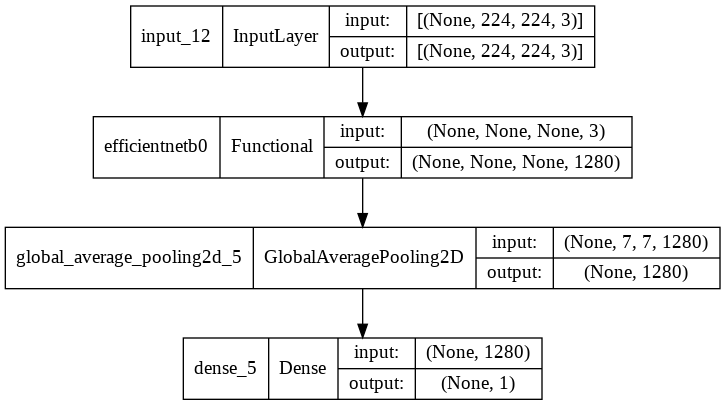

In [ ]:
tf.keras.utils.plot_model(model_1, show_shapes=True)

In [ ]:
!pip install wandb

# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2021-11-28 06:11:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-28 06:11:43 (74.9 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
import wandb

wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [ ]:
#!tensorboard --logdir logs

In [ ]:
#wandb.tensorboard.patch(root_logdir="/content/drive/MyDrive/ML/Food-Not-Food/logs")
wandb.init(project="food-not-food", entity="tejas_makadia", sync_tensorboard=True)

global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
train/epoch_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/epoch_loss,█▆▅▅▄▃▃▃▃▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
validation/epoch_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation/epoch_loss,█▇▆▆▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
validation/evaluation_accuracy_vs_iterations,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation/evaluation_loss_vs_iterations,█▇▆▆▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
validation/global_step,▁▁▂▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
global_step,150
train/epoch_accuracy,1.0


In [ ]:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
# create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,
                                                  monitor = 'val_loss')

In [ ]:
str(model_1.name)

'EffNetB0-V1'

In [ ]:


history_1 = model_1.fit(train_data,
                        epochs = 50,
                        validation_data = test_data,
                        callbacks = [early_stopping,
                        create_tensorboard_callback("logs", model_1.name)])

wandb: WARNING When using several event log directories, please call wandb.tensorboard.patch(root_logdir="...") before wandb.init


Saving TensorBoard log files to: logs/EffNetB0-V1/20211128-061223


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.6092

wandb: WARNING When using several event log directories, please call wandb.tensorboard.patch(root_logdir="...") before wandb.init


3/3 [==============================] - 9s 1s/step - loss: 0.6617 - accuracy: 0.6092 - val_loss: 0.6162 - val_accuracy: 0.6875
Epoch 2/50
3/3 [==============================] - 1s 261ms/step - loss: 0.5650 - accuracy: 0.7241 - val_loss: 0.5215 - val_accuracy: 0.7500
Epoch 3/50
3/3 [==============================] - 1s 247ms/step - loss: 0.4731 - accuracy: 0.8046 - val_loss: 0.4406 - val_accuracy: 0.8438
Epoch 4/50
3/3 [==============================] - 1s 235ms/step - loss: 0.4000 - accuracy: 0.9080 - val_loss: 0.3731 - val_accuracy: 0.9688
Epoch 5/50
3/3 [==============================] - 1s 232ms/step - loss: 0.3350 - accuracy: 0.9540 - val_loss: 0.3172 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 1s 233ms/step - loss: 0.2842 - accuracy: 0.9655 - val_loss: 0.2709 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 1s 230ms/step - loss: 0.2429 - accuracy: 0.9655 - val_loss: 0.2334 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==================

In [ ]:
model_1.evaluate(test_data)

1/1 [==============================] - 0s 246ms/step - loss: 0.0282 - accuracy: 1.0000


[0.02824988216161728, 1.0]